In [1]:
import pandas as pd
from numpy.polynomial.polynomial import Polynomial
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np

In [2]:
cz = pd.read_csv("input/out_cz.csv")
cz = cz.sort_values(by=['alpha'])
cz = cz.reset_index()

cx = pd.read_table("input/out_cx.txt")
cx = cx.sort_values(by="cz")
cx = cx.reset_index()


In [3]:
# fig, ax = plt.subplots()

# # ax.plot(cz["alpha"], cz[" cz"])
# ax.scatter(cx["cz"], cx["cx"])

In [4]:
cubic_spline_interpolation = CubicSpline(list(cx["cz"]), list(cx["cx"]))
out_cx = cubic_spline_interpolation(cz[" cz"])

x = np.linspace(min(cz[" cz"]), max(cz[" cz"]), 10000)
interpolated = cubic_spline_interpolation(x)
print("najmniejsza wartość c_x", min(interpolated))


najmniejsza wartość c_x 0.006328405462643666


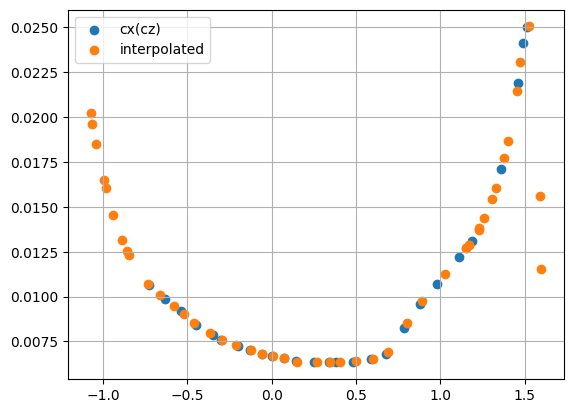

In [5]:
# wyplotowanie zinterpolowanych wartości 
fig,ax = plt.subplots()
ax.scatter(cx["cz"], cx["cx"], label = "cx(cz)")
ax.scatter(cz[" cz"], out_cx, label = "interpolated")
ax.grid(True)
ax.legend()

# ax.set_xlim([1.1, 1.7])

In [6]:
cz["cx"] = out_cx
cz.to_clipboard()
# cz.set_index

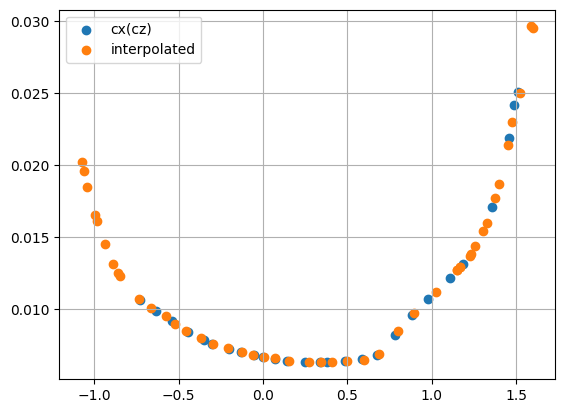

In [7]:
# sprawdzenie poprawionych ręcznie wartości
pop = pd.read_table("input/poprawione.txt")
fig,ax = plt.subplots()

ax.scatter(cx["cz"], cx["cx"], label = "cx(cz)")
ax.scatter(pop["cz"], pop["cx"], label = "interpolated")
ax.grid(True)
ax.legend()

-0.0026150816048277174


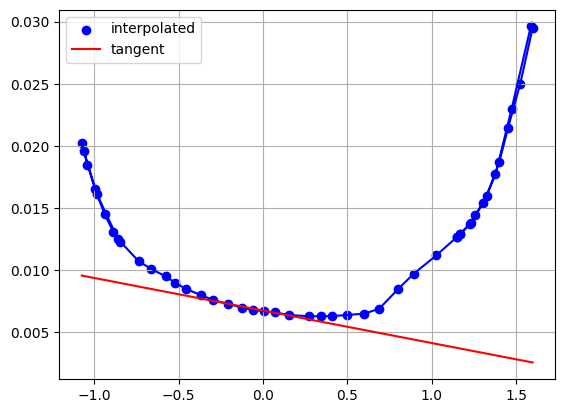

In [8]:
from scipy import interpolate
tck = interpolate.splrep(list(cx["cz"]), list(cx["cx"]))

x0 = 0.1
y0 = interpolate.splev(x0,tck)
dydx = interpolate.splev(x0,tck,der=1)

tngnt = lambda x: dydx*x + (y0-dydx*x0)
print(dydx)

# ===========================================
fig,ax = plt.subplots()
ax.scatter(pop["cz"], pop["cx"], label = "interpolated", c ="b")
ax.plot(pop["cz"], pop["cx"], c ="b")

ax.plot(x,tngnt(x), label="tangent", c="r")
ax.legend()
ax.grid(True)

In [9]:
import math

def get_slope(x0):
    y0 = interpolate.splev(x0,tck)
    return interpolate.splev(x0,tck,der=1)

slopes = [get_slope(i) for i in x]
minmax= np.array([max(slopes), min(slopes)])
print("rad",minmax)
print("stopnie",minmax*180/math.pi)
    

rad [ 0.07287122 -0.4005002 ]
stopnie [  4.17521319 -22.94697118]


0.15798156806048758


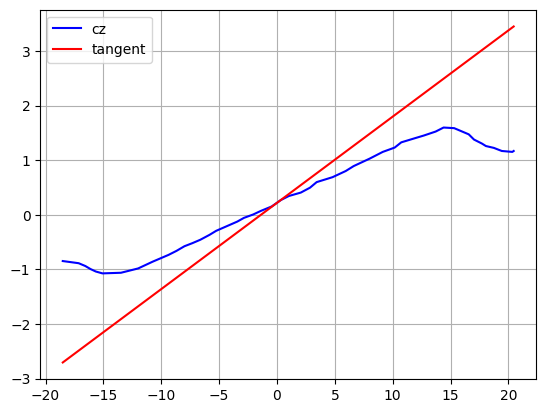

In [10]:
from scipy import interpolate

x = np.linspace(min(cz["alpha"]), max(cz["alpha"]), 10000)
tck = interpolate.splrep(list(cz["alpha"]), list(cz[" cz"]))

x0 = 0
y0 = interpolate.splev(x0,tck)
dydx = interpolate.splev(x0,tck,der=1)

tngnt = lambda x: dydx*x + (y0-dydx*x0)
print(dydx)

# ===========================================
fig,ax = plt.subplots()
ax.plot(cz["alpha"], cz[" cz"], label = "cz", c ="b")
# ax.plot(pop["cz"], pop["cx"], c ="b")

ax.plot(x,tngnt(x), label="tangent", c="r")
ax.legend()
ax.grid(True)

In [11]:
print(max(cz[" cz"]))

1.5988700564971747


In [12]:
def get_interpolated_cz(x0):
    tck = interpolate.splrep(list(cz["alpha"]), list(cz[" cz"]))
    return interpolate.splev(x0,tck,der=1)

l1 = [get_interpolated_cz(i) for i in x]
print(max(l1))


0.1881707634500785


In [13]:
def get_slope(x0):
    y0 = interpolate.splev(x0,tck)
    return interpolate.splev(x0,tck,der=1)

slopes = [get_slope(i) for i in np.linspace(-10, 10, 1000)]
# minmax= np.array([max(slopes), min(slopes)])
# print("rad",minmax)
# print("stopnie",minmax*180/math.pi)
print(sum(slopes)/len(slopes))

0.10007267115161869
